# saudi pro league Analysis

In [207]:
#import neccesary libaries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [208]:
df = pd.read_csv('saudi-pro-league-transfers.csv')
df.sample(5)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
4244,Al-Fayha FC,Alexandros Tziolis,32.0,Defensive Midfield,Heart of Midl.,free transfer,in,Summer,0.0,Saudi Professional League,2017,2017/2018,Saudi Arabia
5668,Al-Adalah FC,Yassine Boufalgha,29.0,Centre-Back,Al-Jeel,free transfer,out,Summer,0.0,Saudi Professional League,2019,2019/2020,Saudi Arabia
273,Al-Shabab FC,Fernandes,26.0,Attacking Midfield,Figueirense FC,"End of loanDec 1, 2004",out,Winter,NaN,Saudi Professional League,2004,2004/2005,Saudi Arabia
5042,Al-Fayha FC,Iury Castilho,23.0,Centre-Forward,Al-Nasr SC,loan transfer,in,Winter,NaN,Saudi Professional League,2018,2018/2019,Saudi Arabia
4469,Al-Batin FC,Edison Tarabai,32.0,Centre-Forward,Hibernians FC,"End of loanJan 18, 2018",out,Winter,NaN,Saudi Professional League,2017,2017/2018,Saudi Arabia


In [209]:
# information about the table
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7858 entries, 0 to 7857
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           7858 non-null   object 
 1   player_name         7858 non-null   object 
 2   age                 7755 non-null   float64
 3   position            7858 non-null   object 
 4   club_involved_name  7858 non-null   object 
 5   fee                 7844 non-null   object 
 6   transfer_movement   7858 non-null   object 
 7   transfer_period     7858 non-null   object 
 8   fee_cleaned         2374 non-null   float64
 9   league_name         7858 non-null   object 
 10  year                7858 non-null   int64  
 11  season              7858 non-null   object 
 12  country             7858 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 798.2+ KB


In [210]:
# making a copy of original dataframe using .copy() 
df1=df.copy()

# wrangling

In [211]:
# finding all null values in the data
df1.isnull().sum()

club_name                0
player_name              0
age                    103
position                 0
club_involved_name       0
fee                     14
transfer_movement        0
transfer_period          0
fee_cleaned           5484
league_name              0
year                     0
season                   0
country                  0
dtype: int64

In [212]:
#dropping incomplete columns with alot of missing numbers
df1.drop(labels='fee_cleaned',axis="columns",inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7858 entries, 0 to 7857
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           7858 non-null   object 
 1   player_name         7858 non-null   object 
 2   age                 7755 non-null   float64
 3   position            7858 non-null   object 
 4   club_involved_name  7858 non-null   object 
 5   fee                 7844 non-null   object 
 6   transfer_movement   7858 non-null   object 
 7   transfer_period     7858 non-null   object 
 8   league_name         7858 non-null   object 
 9   year                7858 non-null   int64  
 10  season              7858 non-null   object 
 11  country             7858 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 736.8+ KB


In [213]:
#filling the null values in age with average age of footballers

df1['age'].fillna(df1['age'].mean(),inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7858 entries, 0 to 7857
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           7858 non-null   object 
 1   player_name         7858 non-null   object 
 2   age                 7858 non-null   float64
 3   position            7858 non-null   object 
 4   club_involved_name  7858 non-null   object 
 5   fee                 7844 non-null   object 
 6   transfer_movement   7858 non-null   object 
 7   transfer_period     7858 non-null   object 
 8   league_name         7858 non-null   object 
 9   year                7858 non-null   int64  
 10  season              7858 non-null   object 
 11  country             7858 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 736.8+ KB


In [214]:
#to see all the columns
df1.columns

Index(['club_name', 'player_name', 'age', 'position', 'club_involved_name',
       'fee', 'transfer_movement', 'transfer_period', 'league_name', 'year',
       'season', 'country'],
      dtype='object')

In [215]:
df1.sample(5)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,year,season,country
7522,Al-Hazem SC,Ammar Al-Najjar,26.0,Right Winger,Damac FC,free transfer,in,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia
5474,Damac FC,Chamseddine Rahmani,28.0,Goalkeeper,CS Constantine,?,in,Summer,Saudi Professional League,2019,2019/2020,Saudi Arabia
3713,Al-Faisaly FC,Adriano Pardal,29.0,Centre-Forward,Without Club,-,out,Summer,Saudi Professional League,2016,2016/2017,Saudi Arabia
2293,Al-Ahli SFC,Victor Simões,32.0,Centre-Forward,Umm Salal SC,?,out,Winter,Saudi Professional League,2013,2013/2014,Saudi Arabia
2165,Al-Taawoun FC,Sultan Al-Yami,26.0,Centre-Back,Al-Faisaly FC,?,out,Summer,Saudi Professional League,2013,2013/2014,Saudi Arabia


In [216]:
# total number of clubs in saudi arabia
df1['club_name'].nunique()

31

In [217]:
#checking duplicates
df1.duplicated().sum()

#dropping duplicates
df1.drop_duplicates()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,year,season,country
0,Al-Hilal SFC,Khaled Aziz,18.000000,Defensive Midfield,Unknown,?,in,Summer,Saudi Professional League,2000,2000/2001,Saudi Arabia
1,Al-Hilal SFC,Sami Al-Jaber,27.000000,Centre-Forward,Wolves,loan transfer,out,Summer,Saudi Professional League,2000,2000/2001,Saudi Arabia
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.000000,Right Winger,Al-Nassr,-,out,Summer,Saudi Professional League,2000,2000/2001,Saudi Arabia
3,Al-Hilal SFC,Saleh Al-Salloumi,37.000000,Goalkeeper,Retired,-,out,Summer,Saudi Professional League,2000,2000/2001,Saudi Arabia
4,Al-Hilal SFC,Elijah Litana,29.000000,Centre-Back,Retired,-,out,Summer,Saudi Professional League,2000,2000/2001,Saudi Arabia
...,...,...,...,...,...,...,...,...,...,...,...,...
7853,Al-Raed SFC,Mamadou Loum,27.000000,Defensive Midfield,FC Porto,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024,2024/2025,Saudi Arabia
7854,Al-Ettifaq FC,Rayan Al-Bloushi,23.000000,Centre-Forward,Al-Safa,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024,2024/2025,Saudi Arabia
7855,Al-Taawoun FC,Flávio,28.000000,Central Midfield,Trabzonspor,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024,2024/2025,Saudi Arabia
7856,Al-Taawoun FC,Muath Faquihi,22.000000,Left-Back,Al-Hilal,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024,2024/2025,Saudi Arabia


# Exploratory Data Analysis

In [218]:
#Top 5 most tranfers over the years 
df1['club_name'].value_counts().head()

club_name
Ittihad Club    640
Al-Ahli SFC     596
Al-Nassr FC     567
Al-Shabab FC    542
Al-Hilal SFC    541
Name: count, dtype: int64

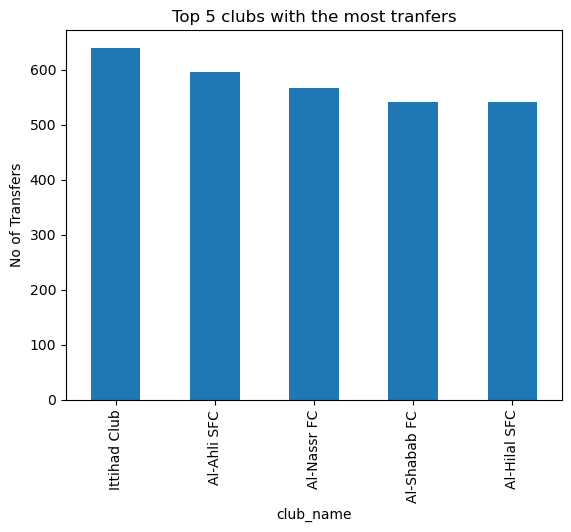

In [219]:
#Top 5 most tranfers by clubs over the years
df1['club_name'].value_counts().head().plot(kind='bar')
plt.title('Top 5 clubs with the most tranfers')
plt.ylabel('No of Transfers');

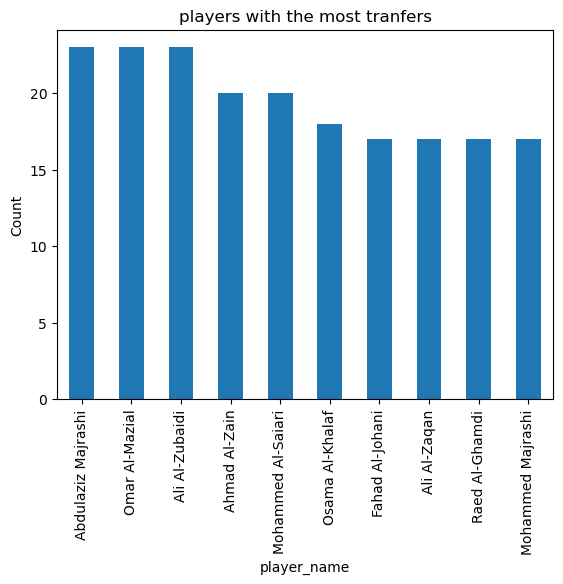

In [220]:
#player with the most tranfers
df1['player_name'].value_counts().head(10).plot(kind='bar')
plt.title('players with the most tranfers')
plt.ylabel('Count');

## Abdulaziz Majrashi was the most transfered player in the league


# OR

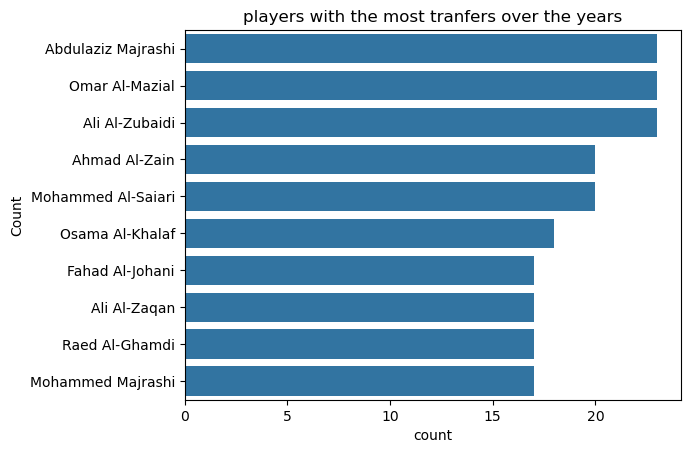

In [221]:

player_name = df1['player_name'].value_counts().head(10)
base_color = sns.color_palette()[0]
sns.barplot(x=player_name,y=player_name.index,color=base_color)
plt.title('players with the most tranfers over the years')
plt.ylabel('Count');

In [222]:
df1[df1['player_name']=='Abdulaziz Majrashi']['year'].min()
#first year of abdul transfer

2016

In [223]:
No_of_club = df1[df1['player_name']=='Abdulaziz Majrashi']['club_name'].value_counts()

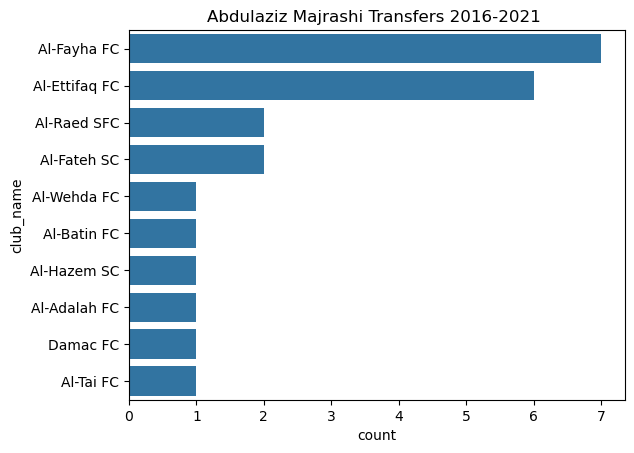

In [224]:
base_color = sns.color_palette()[0]
sns.barplot(x=No_of_club,y=No_of_club.index,color=base_color)
plt.title('Abdulaziz Majrashi Transfers 2016-2021 ');


In [225]:
#types of various positions
df1['position'].unique()



array(['Defensive Midfield', 'Centre-Forward', 'Right Winger',
       'Goalkeeper', 'Centre-Back', 'Attacking Midfield', 'Left Midfield',
       'Left Winger', 'Attack', 'Right Midfield', 'Midfield',
       'Central Midfield', 'Right-Back', 'Second Striker', 'Sweeper',
       'Defence', 'Left-Back'], dtype=object)

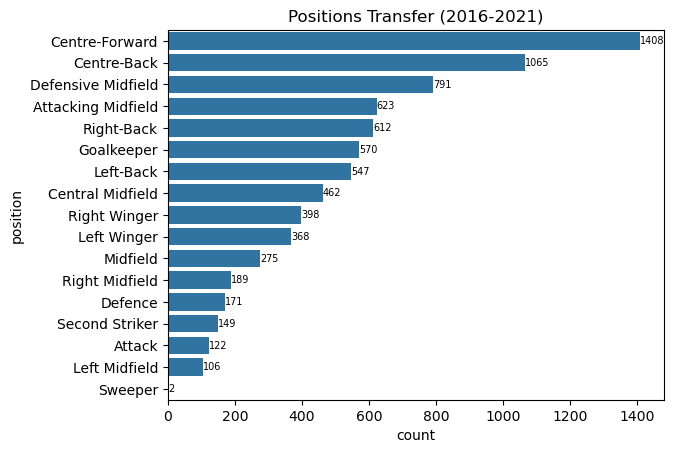

In [226]:
base_color = sns.color_palette()[0]
othering= df1.position.value_counts().index
ax=sns.countplot(data=df1,y='position',order=othering,color=base_color)
plt.title('Positions Transfer (2016-2021)')
ax.bar_label(ax.containers[0],fontsize=7);

## There are 17 different types of position in football
## The most sourced position is Center Forward 

## Age distribution of the players in Saudi Pro League

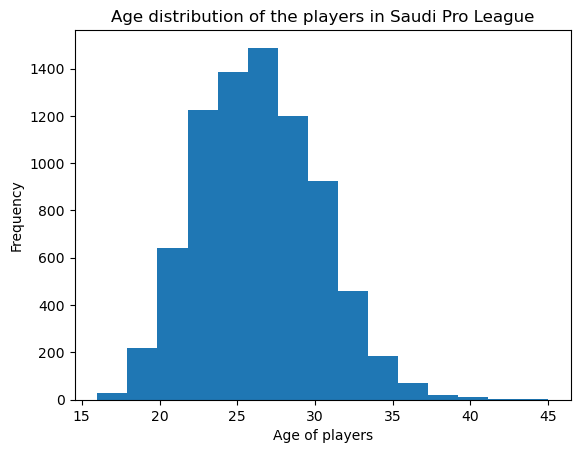

In [227]:
# Age distribution of the players in Saudi Pro League
plt.hist(data=df1,x='age',bins=15)
plt.title('Age distribution of the players in Saudi Pro League')
plt.xlabel('Age of players')
plt.ylabel('Frequency');


## most expensive player

In [228]:
df.fee.unique()

array(['?', 'loan transfer', '-', '€2.00m', 'free transfer',
       'End of loanJun 30, 2000', 'End of loanJan 30, 2001',
       'Loan fee:€19k', '€50k', 'End of loanDec 31, 2000',
       'End of loanJun 30, 2001', 'End of loanDec 31, 2001',
       'End of loanMay 1, 2003', '€170k', '€1.10m',
       'End of loanJun 30, 2003', '€500k', 'End of loanAug 1, 2003',
       'End of loanJun 22, 2003', 'End of loanJun 30, 2004', '€400k',
       'Loan fee:€150k', 'End of loanDec 1, 2004',
       'End of loanMar 30, 2005', '€6.00m', 'End of loanMay 1, 2006',
       '€4.50m', 'End of loanJul 1, 2005', '€250k',
       'End of loanJun 30, 2005', '€1.00m', 'Loan fee:€700k',
       'End of loanDec 1, 2005', '€75k', 'End of loanJun 30, 2006',
       '€160k', '€2.50m', 'End of loanJun 1, 2006', '€1.20m',
       'Loan fee:€200k', 'End of loanDec 31, 2006',
       'End of loanApr 1, 2007', '€600k', 'End of loanDec 1, 2006',
       '€9.00m', '€200k', 'End of loanJun 30, 2007',
       'End of loanJun 1, 200

In [230]:
#bringing out the index in a list
df2_index = df1.fee.index.values
df2_index = df1[df1['fee']=='-'].index.values
df2_index

array([   2,    3,    4,    8,   11,   13,   15,   22,   26,   27,   54,
         59,   60,   69,   80,   85,   91,   93,   96,   98,   99,  100,
        104,  105,  150,  151,  160,  166,  167,  168,  174,  175,  192,
        203,  204,  207,  221,  233,  246,  247,  255,  256,  267,  286,
        294,  298,  307,  308,  327,  335,  336,  337,  338,  339,  345,
        380,  389,  398,  404,  413,  414,  426,  427,  447,  448,  449,
        495,  496,  497,  498,  499,  503,  510,  511,  512,  519,  520,
        522,  523,  524,  531,  539,  540,  551,  574,  581,  587,  617,
        628,  629,  630,  637,  638,  646,  647,  670,  682,  689,  691,
        696,  718,  727,  752,  779,  784,  803,  804,  805,  810,  811,
        817,  824,  832,  851,  854,  863,  869,  884,  946,  970,  977,
       1045, 1053, 1054, 1070, 1071, 1072, 1073, 1083, 1094, 1102, 1111,
       1125, 1126, 1137, 1138, 1150, 1168, 1214, 1225, 1230, 1238, 1252,
       1262, 1268, 1275, 1276, 1299, 1307, 1349, 13

In [231]:
#bringing out the index in a list
df2_index1 = df1[df1['fee']=='?'].index.values
df2_index1

array([   0,    9,   10, ..., 7839, 7840, 7841], dtype=int64)

In [232]:
#dropping rows with - and ?
df2_fee = df1.drop(labels=df2_index)
df2_fee = df1.drop(labels=df2_index1)


In [233]:
#limiting the values down to 2023 because world record transfers where carried out in this year
df3_fee = df2_fee[df2_fee['year']==2023]


In [234]:
# unique values of fee in 2023

df3_fee.fee.unique()

array(['€35.00m', '€30.00m', '€27.20m', '€18.50m', '€12.50m',
       'free transfer', 'End of loanJun 30, 2023', 'loan transfer', '-',
       '€1.50m', 'End of loanJun 30, 2024', '€1.00m', 'Loan fee:€92k',
       '€800k', '€46.70m', '€29.10m', '€750k', '€25.00m', '€18.00m',
       '€4.60m', '€1.38m', '€6.50m', '€1.20m', '€90.00m', '€60.00m',
       '€55.00m', '€40.00m', '€23.00m', '€4.00m', 'Loan fee:€182k',
       '€5.00m', '€903k', '€2.75m', 'End of loanAug 31, 2023', '€2.50m',
       '€14.00m', '€4.65m', '€3.20m', '€1.37m', '€700k',
       'End of loanDec 31, 2023'], dtype=object)

In [237]:
# dropping values that isnt in millions

df3_fee_1 = df3_fee[df3_fee['fee']=='free transfer'].index.values
df3_fee_2 = df3_fee[df3_fee['fee']=='End of loanJun 30, 2023'].index.values
df3_fee_3 = df3_fee[df3_fee['fee']=='loan transfer'].index.values
df3_fee_4 = df3_fee[df3_fee['fee']=='-'].index.values
df3_fee_5 = df3_fee[df3_fee['fee']=='End of loanJun 30, 2024'].index.values
df3_fee_6 = df3_fee[df3_fee['fee']=='Loan fee:€92k'].index.values
df3_fee_7 = df3_fee[df3_fee['fee']=='€800k'].index.values
df3_fee_8 = df3_fee[df3_fee['fee']=='Loan fee:€182k'].index.values
df3_fee_9 = df3_fee[df3_fee['fee']=='€903k'].index.values
df3_fee_10 = df3_fee[df3_fee['fee']=='End of loanAug 31, 2023'].index.values
df3_fee_11 = df3_fee[df3_fee['fee']=='€700k'].index.values
df3_fee_12 = df3_fee[df3_fee['fee']=='End of loanDec 31, 2023'].index.values
df3_fee_13 = df3_fee[df3_fee['fee']=='750k'].index.values




df3_fee = df3_fee.drop(labels=df3_fee_1)
df3_fee = df3_fee.drop(labels=df3_fee_2)
df3_fee = df3_fee.drop(labels=df3_fee_3)
df3_fee = df3_fee.drop(labels=df3_fee_4)
df3_fee = df3_fee.drop(labels=df3_fee_5)
df3_fee = df3_fee.drop(labels=df3_fee_6)
df3_fee = df3_fee.drop(labels=df3_fee_7)
df3_fee = df3_fee.drop(labels=df3_fee_8)
df3_fee = df3_fee.drop(labels=df3_fee_9)
df3_fee = df3_fee.drop(labels=df3_fee_10)
df3_fee = df3_fee.drop(labels=df3_fee_11)
df3_fee = df3_fee.drop(labels=df3_fee_12)
df3_fee = df3_fee.drop(labels=df3_fee_13)

In [241]:
# remove € and m sign from fee
df3_fee['fee'].replace(['€','m'],'',inplace=True,regex=True)



df3_fee.sample(5)
#check random

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,year,season,country
7791,Al-Wehda FC,Jawad El Yamiq,31.0,Centre-Back,Real Valladolid,1.20,in,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia
7547,Al-Okhdood Club,Andrei Burca,30.0,Centre-Back,CFR Cluj,1.00,in,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia
7655,Al-Hilal SFC,Sergej Milinković-Savić,28.0,Central Midfield,Lazio,40.00,in,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia
7644,Al-Shabab FC,Paulinho Paula,26.0,Central Midfield,Vasco da Gama,1.20,out,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia
7643,Al-Shabab FC,Aaron Boupendza,26.0,Centre-Forward,Cincinnati,6.50,out,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia


In [244]:
# converting fee column to float
df3_fee['fee'] = df3_fee['fee'].astype(float)

In [245]:
df3_fee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 7496 to 7821
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           33 non-null     object 
 1   player_name         33 non-null     object 
 2   age                 33 non-null     float64
 3   position            33 non-null     object 
 4   club_involved_name  33 non-null     object 
 5   fee                 33 non-null     float64
 6   transfer_movement   33 non-null     object 
 7   transfer_period     33 non-null     object 
 8   league_name         33 non-null     object 
 9   year                33 non-null     int64  
 10  season              33 non-null     object 
 11  country             33 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.4+ KB


In [260]:
df3_fee_expensive = df3_fee.sort_values(by='fee',ascending=False).head(20)

df3_fee_expensive

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,year,season,country
7652,Al-Hilal SFC,Neymar,31.0,Left Winger,Paris SG,90.0,in,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia
7653,Al-Hilal SFC,Malcom,26.0,Right Winger,Zenit S-Pb,60.0,in,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia
7654,Al-Hilal SFC,Rúben Neves,26.0,Defensive Midfield,Wolves,55.0,in,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia
7596,Ittihad Club,Fabinho,29.0,Defensive Midfield,Liverpool,46.7,in,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia
7655,Al-Hilal SFC,Sergej Milinković-Savić,28.0,Central Midfield,Lazio,40.0,in,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia
7496,Al-Ahli SFC,Riyad Mahrez,32.0,Right Winger,Man City,35.0,in,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia
7497,Al-Ahli SFC,Roger Ibañez,24.0,Centre-Back,AS Roma,30.0,in,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia
7621,Al-Nassr FC,Sadio Mané,31.0,Left Winger,Bayern Munich,30.0,in,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia
7597,Ittihad Club,Jota,24.0,Left Winger,Celtic,29.1,in,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia
7498,Al-Ahli SFC,Allan Saint-Maximin,26.0,Left Winger,Newcastle,27.2,in,Summer,Saudi Professional League,2023,2023/2024,Saudi Arabia


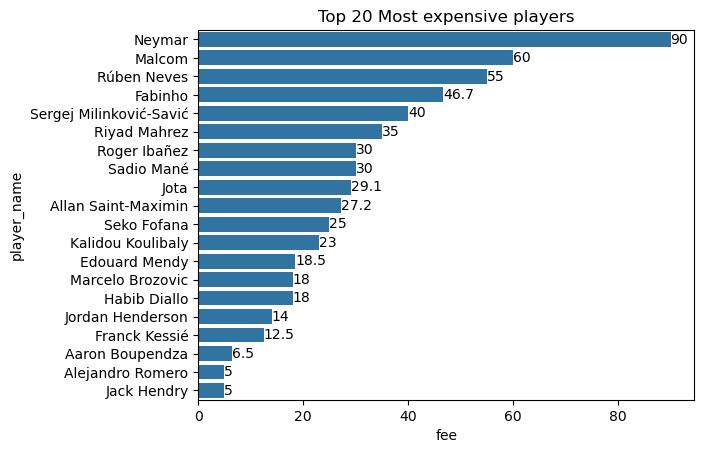

In [276]:
base_color = sns.color_palette()[0]
ax = sns.barplot(data=df3_fee_expensive,x='fee', y='player_name',color=base_color)
ax.bar_label(ax.containers[0])
plt.title('Top 20 Most expensive players');

### Neymar is the most expensive player in the saudi pro league

# in or out


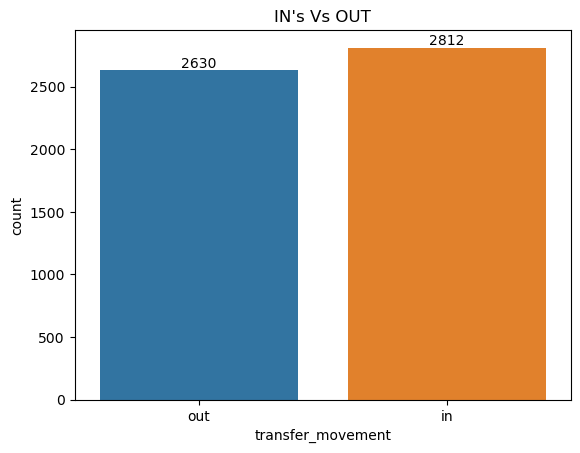

In [280]:
ax=sns.countplot(data=df2_fee,x='transfer_movement')
ax.bar_label(ax.containers[0])
plt.title("IN's Vs OUT");

### The league recorded more incomings than outgoing

In [285]:
df2_fee.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,year,season,country
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,Saudi Professional League,2000,2000/2001,Saudi Arabia
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,-,out,Summer,Saudi Professional League,2000,2000/2001,Saudi Arabia
3,Al-Hilal SFC,Saleh Al-Salloumi,37.0,Goalkeeper,Retired,-,out,Summer,Saudi Professional League,2000,2000/2001,Saudi Arabia
4,Al-Hilal SFC,Elijah Litana,29.0,Centre-Back,Retired,-,out,Summer,Saudi Professional League,2000,2000/2001,Saudi Arabia
5,Ittihad Club,Marzouq Al-Otaibi,24.0,Centre-Forward,Al-Shabab,€2.00m,in,Summer,Saudi Professional League,2000,2000/2001,Saudi Arabia


## Most Seasons of Transfer

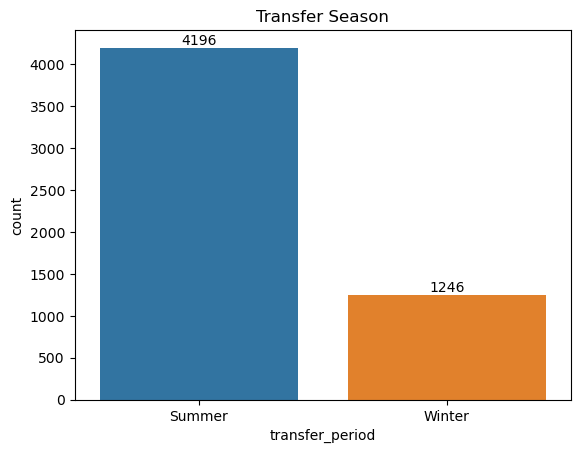

In [283]:
ax=sns.countplot(data=df2_fee,x='transfer_period')
ax.bar_label(ax.containers[0])
plt.title("Transfer Season");

### Most Transfers are done in the Summer window

## Transfer counts

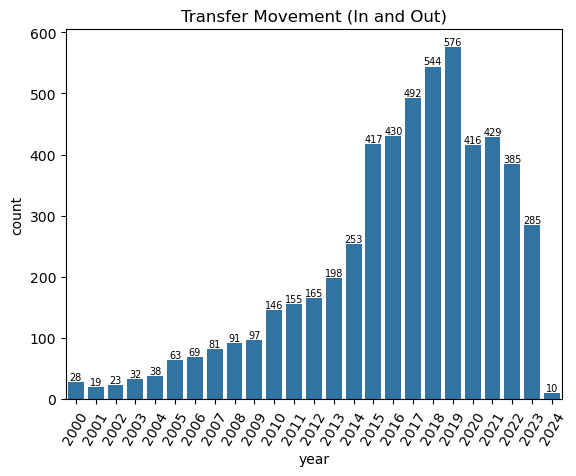

In [295]:
base_color = sns.color_palette()[0]
ax = sns.countplot(data=df2_fee, x='year', color = base_color)
ax.bar_label(ax.containers[0], fontsize = 7)
plt.xticks(rotation = 60)
plt.title('Transfer Movement (In and Out)');

### 2019 recorded the most Transfer with over 576 

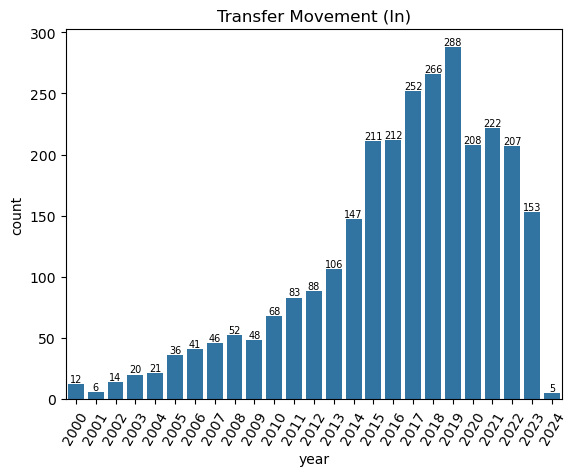

In [302]:
# Players In
players_in = df2_fee[df2_fee['transfer_movement'] == 'in']
base_color = sns.color_palette()[0]
ax = sns.countplot(data=players_in, x='year', color = base_color)
ax.bar_label(ax.containers[0], fontsize = 7)
plt.xticks(rotation = 60)
plt.title('Transfer Movement (In)');

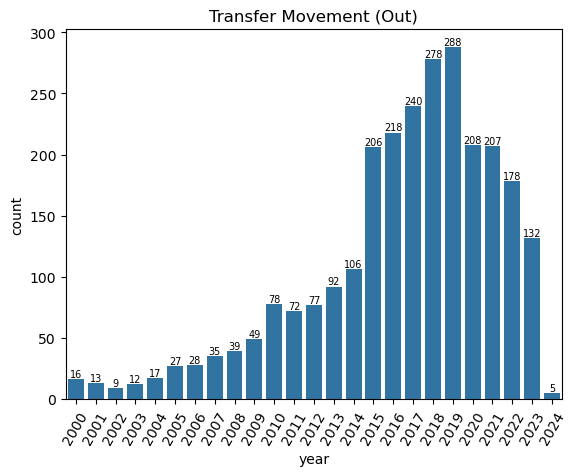

In [301]:
# Players out
players_out = df2_fee[df2_fee['transfer_movement'] == 'out']
base_color = sns.color_palette()[0]
ax = sns.countplot(data=players_out, x='year', color = base_color)
ax.bar_label(ax.containers[0], fontsize = 7)
plt.xticks(rotation = 60)
plt.title('Transfer Movement (Out)');

 # Thank You